In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shandeep777/yellow-taxi-trip-record-of-january-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\devda\.cache\kagglehub\datasets\shandeep777\yellow-taxi-trip-record-of-january-2024\versions\1


In [ ]:
import os

print("Files in dataset directory:", os.listdir(path))


Files in dataset directory: ['yellow_tripdata_2024-01.parquet']


In [9]:
data = pd.read_parquet(path + "/yellow_tripdata_2024-01.parquet")

In [10]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2.0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186.0,79.0,2.0,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1.0,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140.0,236.0,1.0,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1.0,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236.0,79.0,1.0,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1.0,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79.0,211.0,1.0,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1.0,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211.0,148.0,1.0,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


EDA

In [11]:
data.shape

(2964624, 19)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           float64       
 8   DOLocationID           float64       
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [13]:
data.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [14]:
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration'] = data['duration'].dt.total_seconds() / 60  # Convert to minutes

In [15]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2.0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186.0,79.0,2.0,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1.0,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140.0,236.0,1.0,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1.0,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236.0,79.0,1.0,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1.0,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79.0,211.0,1.0,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1.0,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211.0,148.0,1.0,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


In [16]:
data = data[['passenger_count', 'trip_distance', 'fare_amount', 'duration','payment_type']]

In [17]:
data

,passenger_count,trip_distance,fare_amount,duration,payment_type
0,1.0,1.72,17.70,19.800000,2.0
1,1.0,1.80,10.00,6.600000,1.0
2,1.0,4.70,23.30,17.916667,1.0
3,1.0,1.40,10.00,8.300000,1.0
4,1.0,0.80,7.90,6.100000,1.0
...,...,...,...,...,...
2964619,NaN,3.18,15.77,8.616667,0.0
2964620,NaN,4.00,18.40,14.750000,0.0
2964621,NaN,3.33,19.97,19.000000,0.0
2964622,NaN,3.06,23.88,17.850000,0.0


In [18]:
data.isnull().sum()

passenger_count    140162
trip_distance           0
fare_amount             0
duration                0
payment_type            0
dtype: int64

In [19]:
data['payment_type'].value_counts()

payment_type
1.0    2319046
2.0     439191
0.0     140162
4.0      46628
3.0      19597
Name: count, dtype: int64

In [20]:
data['payment_type'] = data['payment_type'].replace(0.0, np.nan)

In [21]:
data.isnull().sum()

passenger_count    140162
trip_distance           0
fare_amount             0
duration                0
payment_type       140162
dtype: int64

In [22]:
(140162/len(data))*100

4.727817085741734

In [23]:
data.dropna(inplace=True)

In [24]:
data

,passenger_count,trip_distance,fare_amount,duration,payment_type
0,1.0,1.72,17.7,19.800000,2.0
1,1.0,1.80,10.0,6.600000,1.0
2,1.0,4.70,23.3,17.916667,1.0
3,1.0,1.40,10.0,8.300000,1.0
4,1.0,0.80,7.9,6.100000,1.0
...,...,...,...,...,...
2824457,1.0,3.51,16.3,8.033333,1.0
2824458,1.0,3.36,18.4,16.516667,1.0
2824459,3.0,3.30,17.7,16.783333,1.0
2824460,0.0,0.40,5.1,3.400000,2.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2824462 entries, 0 to 2824461
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   trip_distance    float64
 2   fare_amount      float64
 3   duration         float64
 4   payment_type     float64
dtypes: float64(5)
memory usage: 129.3 MB


In [26]:
data['passenger_count'] = data['passenger_count'].astype('int64')

In [27]:
data['payment_type'] = data['payment_type'].astype('int64')

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data.shape

(1682947, 5)

In [30]:
data['passenger_count'].value_counts(normalize=True)*100

passenger_count
1    68.519448
2    18.742836
3     5.001821
4     2.961769
5     1.926858
0     1.545563
6     1.298496
8     0.002674
7     0.000475
9     0.000059
Name: proportion, dtype: float64

In [31]:
data['payment_type'].value_counts(normalize=True)*100

payment_type
1    75.983141
2    20.534871
4     2.542385
3     0.939602
Name: proportion, dtype: float64

In [32]:
data = data[data['payment_type']<3]
data = data[(data['passenger_count']>0) & (data['passenger_count']<6)]

In [33]:
data.shape

(1577569, 5)

In [34]:
data['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)

In [35]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,1.577569e+06,1.577569e+06,1.577569e+06,1.577569e+06
mean,1.471666e+00,4.658786e+00,2.421611e+01,2.057123e+01
std,8.837876e-01,1.602199e+01,2.116216e+01,4.549112e+01
min,1.000000e+00,0.000000e+00,-8.990000e+02,-1.356667e+01
25%,1.000000e+00,1.400000e+00,1.140000e+01,1.013333e+01
50%,1.000000e+00,2.520000e+00,1.700000e+01,1.608333e+01
75%,2.000000e+00,5.370000e+00,2.890000e+01,2.433333e+01
max,5.000000e+00,1.540032e+04,2.221300e+03,9.455400e+03


In [36]:
data = data[data['fare_amount'] > 0]
data = data[data['trip_distance'] > 0]
data = data[data['duration'] > 0]

In [37]:
data.shape

(1554774, 5)

In [38]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,1.554774e+06,1.554774e+06,1.554774e+06,1.554774e+06
mean,1.472369e+00,4.708671e+00,2.430405e+01,2.065956e+01
std,8.846589e-01,1.612690e+01,2.049635e+01,4.545995e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.440000e+00,1.140000e+01,1.023333e+01
50%,1.000000e+00,2.560000e+00,1.700000e+01,1.615000e+01
75%,2.000000e+00,5.430000e+00,2.890000e+01,2.436667e+01
max,5.000000e+00,1.540032e+04,2.221300e+03,9.455400e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x1ff5b1d5810>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff5b1d5a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff5b1416d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff5b1d5d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff5b1d5e50>],
 'means': []}

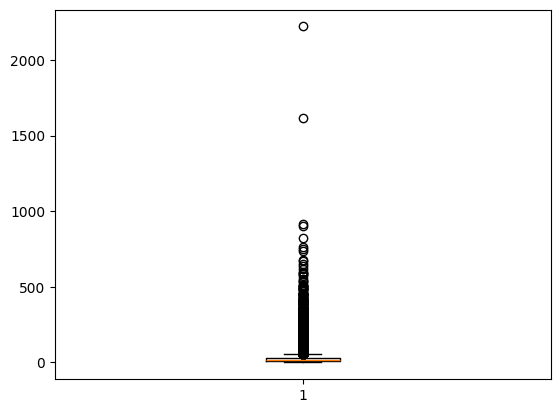

In [39]:
plt.boxplot(data['fare_amount'])

(array([1.554771e+06, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.0000000e-02, 1.5400410e+03, 3.0800720e+03, 4.6201030e+03,
        6.1601340e+03, 7.7001650e+03, 9.2401960e+03, 1.0780227e+04,
        1.2320258e+04, 1.3860289e+04, 1.5400320e+04]),
 <BarContainer object of 10 artists>)

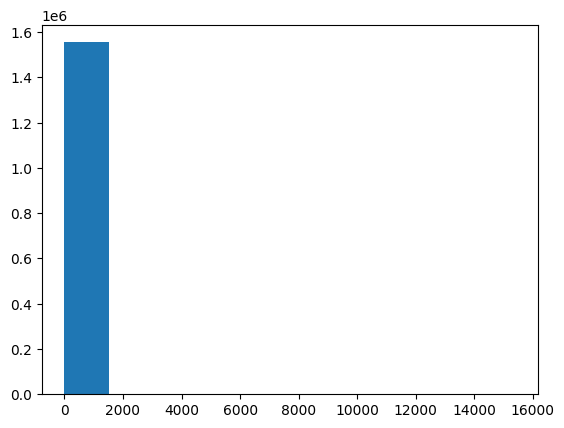

In [40]:
plt.hist(data['trip_distance'])

In [41]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [42]:
data

,passenger_count,trip_distance,fare_amount,duration,payment_type
0,1,1.72,17.7,19.800000,Cash
1,1,1.80,10.0,6.600000,Card
2,1,4.70,23.3,17.916667,Card
3,1,1.40,10.0,8.300000,Card
4,1,0.80,7.9,6.100000,Card
...,...,...,...,...,...
2824456,1,7.68,31.0,14.416667,Card
2824457,1,3.51,16.3,8.033333,Card
2824458,1,3.36,18.4,16.516667,Card
2824459,3,3.30,17.7,16.783333,Card


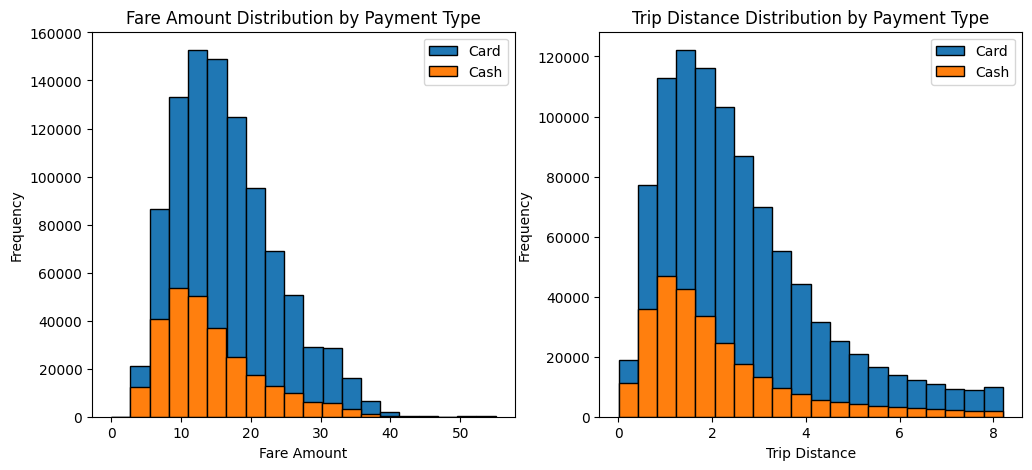

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(data[data['payment_type'] == 'Card']['fare_amount'], label='Card',bins = 20 ,edgecolor='black',color = '#1f77b4',histtype='barstacked')
plt.hist(data[data['payment_type'] == 'Cash']['fare_amount'], label='Cash',bins = 20, edgecolor='black', color = '#ff7f0e',histtype='barstacked')
plt.title('Fare Amount Distribution by Payment Type')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()    

plt.subplot(1,2,2)
plt.hist(data[data['payment_type'] == 'Card']['trip_distance'], label='Card',bins = 20 ,edgecolor='black',color = '#1f77b4',histtype='barstacked')
plt.hist(data[data['payment_type'] == 'Cash']['trip_distance'], label='Cash',bins = 20, edgecolor='black', color = '#ff7f0e',histtype='barstacked')
plt.title('Trip Distance Distribution by Payment Type')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.legend()  

plt.show()

In [44]:
data.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           16.576483  7.252148      2.593979  1.689128
Cash           14.302360  7.046205      2.147177  1.625995

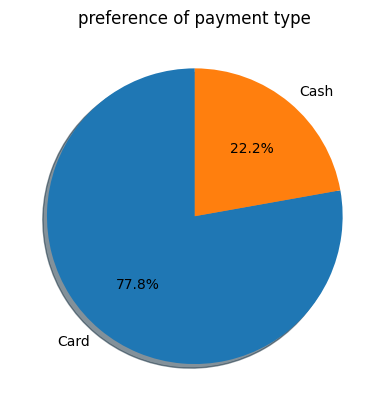

In [45]:
plt.title('preference of payment type')
plt.pie(data['payment_type'].value_counts(normalize = True), labels=data['payment_type'].value_counts().index, autopct='%1.1f%%', startangle=90,shadow = True, colors=['#1f77b4', '#ff7f0e'])
plt.show()  # Equal aspect ratio ensures that pie is drawn as a circle.

In [46]:
passenger_count = data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [47]:
passenger_count['perc'] = (passenger_count['count'] /passenger_count['count'].sum() ) * 100

In [48]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,663232,53.430866
1,Card,2,194205,15.645417
2,Card,3,55238,4.450048
3,Card,4,29306,2.360931
4,Card,5,23841,1.920663
5,Cash,1,196024,15.791958
6,Cash,2,51033,4.111287
7,Cash,3,13628,1.097890
8,Cash,4,9909,0.798282
9,Cash,5,4874,0.392656


In [49]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df


,payment_type,1,2,3,4,5
0,Card,53.430866,15.645417,4.450048,2.360931,1.920663
1,Cash,15.791958,4.111287,1.09789,0.798282,0.392656


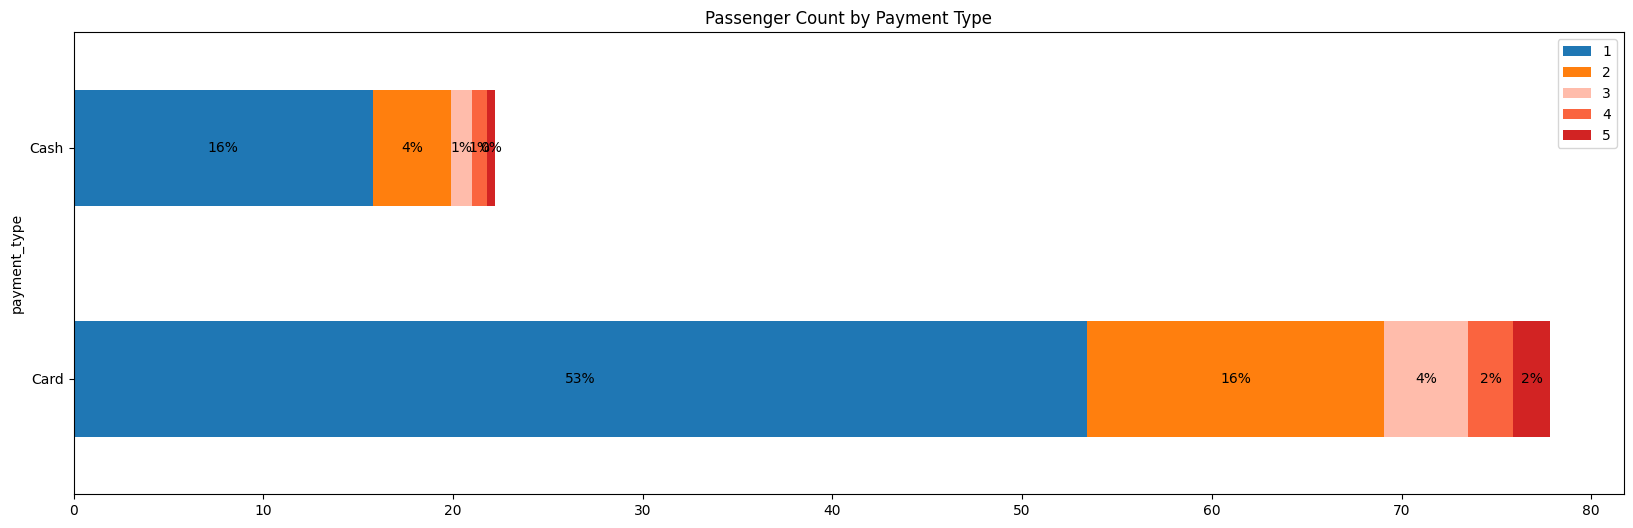

In [50]:
fig,ax = plt.subplots(figsize=(20, 6))
df.plot(x = 'payment_type', kind='barh', stacked=True, ax = ax ,color=['#1f77b4', '#ff7f0e','#FFBCAB','#FA643F',"#CE0E0EE9"], title='Passenger Count by Payment Type')

# ...existing code...
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.0f}%'.format(width), ha='center', va='center')
# ...existing code...

Hypothesis testing

NULL HYPOTHESIS : THESE IS NO DIFFERENCE IN AVG FARE BETWEEN CUSTOMERS WHO USE CREDIT CARDS AND CUSTOMERS YOU USE CASH


ALTERNATIVE HYPOTHESIS : THERE IS A DIFFERENCE IN AVERAGE FARE BETWEEN CUSTOMERS WHO USE CREDIT CARDS AND CUSTOMERS YOU USE CASH

In [51]:
import statsmodels.api as sm

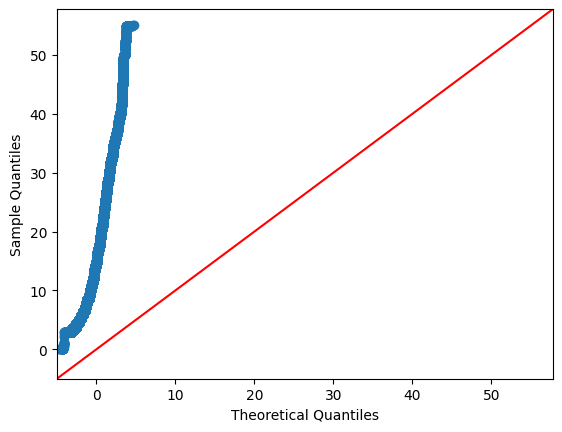

In [53]:
sm.qqplot(data['fare_amount'], line='45')
plt.show()

In [55]:
card_sample = data[data['payment_type'] == 'Card']['fare_amount']
cash_sample = data[data['payment_type'] == 'Cash']['fare_amount']

In [56]:
t_stats, p_value = stats.ttest_ind(a = card_sample, b = cash_sample, equal_var=False)
print(f"T-statistic: {t_stats}, P-value: {p_value}")

T-statistic: 148.44538280691665, P-value: 0.0


 hence null hypothesis is rejected